# Final Project

You will be asked to download data by yourselves and answer several data science questions through this final project. This project has two parts.


## Part 1 (15 Points):

This part contains 10 different data science questions that you are asked to answer. You need to download the corresponding data and write code to process the data to answer these questions. For each question, you need to provide your code to anser this question, as well as final answers. Each question will be worth 1.5 points in this part. 


## Final Submission:

Your final submission will contain two files:

1. The first would be this notebook. You need to provide code for your answers as well as your answers. You also need to provide visualization and executive summary using Markdown in this notebook. 

2. The second is the html version of this notebook. 


## Part 1

First, you need to download the most recent datasets containing listing and reviews in **Los Angeles** from [insidearibnb.com](http://insideairbnb.com/get-the-data.html). (September,2019,detailed data)You will then need to provide the code as well as answers to the following questions.

**To make sure that you downloaded the right dataset, your solution to Question 1 should be:**
1. **Number of unique listings = 45053**
2. **Number of unique hosts = 26286**

### Question 1: How many unique listings are there in the LA dataset? How many unique hosts are there?
**Question 1 Answer:**

The number of unique lisiting is 45053. The number of unique hosts is 26286.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# You need to provide the code to answer the previous quesiton
# (you should also briefly explain your data structure -- 
# where do you put your data and how you get your data)
df_listing = pd.read_csv("./listings.csv", low_memory=False)
df_calendar = pd.read_csv("./calendar.csv")
df_review = pd.read_csv("./reviews.csv")
#The data are in the listings.csv, calendar.csv and reviews.csv. The .csv file in the same folder as this python notebook.

df_listing.id.nunique(), df_listing.host_id.nunique()

(45053, 26286)

### Question 2: What is the mean, median, standard deviation, minimum and maximum of the number of listings per host in LA? (for each host, you only need to consider the listings from LA)
**Question 2 Answer:**

The mean is 1.66. The median value is 1. Standard deviation is 2.90. Mininum value is 1. Maximum value is 137.

In [3]:
# You need to provide the code to answer the previous quesiton
df_listing.loc[df_listing["city"] == "Los Angeles",:].groupby(by = "host_id").id.count().describe()

count    16688.000000
mean         1.663651
std          2.900262
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        137.000000
Name: id, dtype: float64

### Question 3: What is the average and standard deviation number of listings for a super host versus a non-super host? Does super host or non-super host have more listings on average?
**Question 3 Answer:**

The average value for a super host is 1.82. The standard deviation is 3.18.  
The average value for a non-super host is 1.67. The standard deviation is 2.93.  
Super hosts have more listings on average.

In [4]:
# You need to provide the code to answer the previous quesiton
df_listing.loc[df_listing["host_is_superhost"] == "t",:].groupby(by = "host_id").id.count().describe()

count    7369.000000
mean        1.824264
std         3.177892
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       172.000000
Name: id, dtype: float64

In [5]:
df_listing.loc[df_listing["host_is_superhost"] == "f",:].groupby(by = "host_id").id.count().describe()

count    18907.000000
mean         1.671021
std          2.926276
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        137.000000
Name: id, dtype: float64

### Question 4: What are the unique types of host verifications are there? (It doesn't matter if you include "None" or empty string as a type)
**Question 4 Answer:**

Types of host verifications include:
 'email',
 'phone',
 'facebook',
 'reviews',
 'kba',
 'jumio',
 'government_id',
 'offline_government_id',
 'selfie',
 'identity_manual',
 'work_email',
 'manual_online',
 'manual_offline',
 'google',
 'sent_id',
 'sesame',
 'sesame_offline',
 'photographer',
 'zhima_selfie',
 'weibo'

In [6]:
# You need to provide the code to answer the previous quesiton
types = []
for index, row in df_listing.iterrows():
    methods = row["host_verifications"].strip("[").strip("]").split(",")
    for method in methods:
        method = method.strip("'").strip("' ")
        if method in types:
            continue
        else:
            types.append(method)
types

['email',
 'phone',
 'facebook',
 'reviews',
 'kba',
 'jumio',
 'government_id',
 'offline_government_id',
 'selfie',
 'identity_manual',
 'work_email',
 'manual_online',
 'manual_offline',
 'google',
 '',
 'sent_id',
 'None',
 'sesame',
 'sesame_offline',
 'photographer',
 'zhima_selfie',
 'weibo']

### Question 5: What are the five most popular verification types of hosts? For each type of the top five verifications, how many percent of hosts verify that type?
**Question 5 Answer:**

The five most popular verification types are: phone,email, reviews, government_id and jumio.  
The percentage of hosts verify phone is 99.67%.  
The percentage of hosts verify email is 93.84%.  
The percentage of hosts verify reviews is 68.85%.  
The percentage of hosts verify government_id is 58.77%.  
The percentage of hosts verify jumio is 43.34%.

In [7]:
# You need to provide the code to answer the previous quesiton
veri_count = {}
df_listing_host = df_listing.drop_duplicates("host_id", keep = "first")
for index, row in df_listing_host.iterrows():
    methods = row["host_verifications"].strip("[").strip("]").split(",")
    for method in methods:
        m = method.strip("'").strip(" '")
        if m in veri_count.keys():
            veri_count[m] += 1
        else:
            veri_count[m] = 1
top5 = dict(sorted(veri_count.items(), key=lambda kv: kv[1], reverse = True)[:5])
top5_veri = list(top5.keys())
top5_veri

['phone', 'email', 'reviews', 'government_id', 'jumio']

In [8]:
total = df_listing_host["host_verifications"].count()
veri_percent = {}
for k in top5.keys():
    veri_percent[k] = veri_count[k]/total*100
veri_percent

{'phone': 99.67663394963098,
 'email': 93.83702351061402,
 'reviews': 68.8541428897512,
 'government_id': 58.768926424712774,
 'jumio': 43.33865936239823}

### Question 6: What is the mean, standard deviation of the average price of a listing in Los Angles from 01/01/2020 to 03/01/2020 (inclusive)? (For listings that are not available in this time, you should not count them in the average price.)

**Question 6 Answer:**

The mean of the average price is 207. The standard deviation is 524.

In [9]:
# You need to provide the code to answer the previous quesiton
df_sample1 = df_listing[["id", "city"]]
df_merge1 = df_sample1.merge(df_calendar, how = "inner", left_on = "id", right_on = "listing_id")
df_merge1.head()

,id,city,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,109,Culver City,109,2019-09-14,f,$115.00,$115.00,30,730
1,109,Culver City,109,2019-09-15,f,$115.00,$115.00,30,730
2,109,Culver City,109,2019-09-16,f,$115.00,$115.00,30,730
3,109,Culver City,109,2019-09-17,f,$115.00,$115.00,30,730
4,109,Culver City,109,2019-09-18,f,$115.00,$115.00,30,730


In [10]:
df_merge1["date"] = pd.to_datetime(df_merge1["date"])
df_merge1["price"] = df_merge1["price"].apply(lambda x: float(x.strip("$").replace(",","")) if type(x) != float else x)
df_merge1.loc[(df_merge1["city"] == "Los Angeles") & (df_merge1["date"] >= "2020-01-01") & (df_merge1["date"] <= "2020-03-01"),:].\
            groupby(by = "id").price.mean().describe()

count    27763.000000
mean       207.103876
std        523.610075
min         10.000000
25%         75.893443
50%        113.918033
75%        188.286885
max      25000.000000
Name: price, dtype: float64

### Question 7: For reviews that are written in Jan, 2016, what are the most popular ten words except stopping words? What about reviews written in March, 2017 and April, 2018?
**Hint**: You need to use NTLK stopping words to find the stopping words in Python. You also need to remove punctuation and numbers

**Question 7 Answer:**

For reviews that are written in Jan, 2016, the most popular 10 words except stopping words are: 'great', 'stay', 'place', 'clean', 'location', 'house', 'us', 'nice', 'would', 'host'.  
For reviews that are written in March, 2017, the most popular 10 words are: 'great', 'place', 'stay', 'location', 'clean', 'nice', 'would', 'host', 'house', 'comfortable'.
For reviews that are written in April, 2018, the most popular 10 words are: 'great', 'place', 'stay', 'location', 'clean', 'would', 'nice', 'host', 'house', 'la'.

In [11]:
# You need to provide the code to answer the previous quesiton
import nltk
from nltk.corpus import stopwords
stop_word = set(stopwords.words('english'))

import string

df_review["date"] = pd.to_datetime(df_review["date"])
df_sample = df_review.loc[(df_review["date"].dt.year == 2016) & (df_review["date"].dt.month == 1),:]

word_count = {}
for index, row in df_sample.iterrows():
    comment = row["comments"]
    if type(comment) == str:
        words = comment.lower().translate(str.maketrans('', '', string.punctuation)).split(" ")
        for word in words:
            if len(word) > 0 and word not in stop_word:
                if word not in word_count.keys():
                    word_count[word] = 1
                else:
                    word_count[word] += 1
top10 = dict(sorted(word_count.items(), key=lambda kv: kv[1], reverse = True)[:10])
top10.keys()

dict_keys(['great', 'stay', 'place', 'clean', 'location', 'house', 'us', 'nice', 'would', 'host'])

In [12]:
df_sample1 = df_review.loc[(df_review["date"].dt.year == 2017) & (df_review["date"].dt.month == 3),:]

word_count = {}
for index, row in df_sample1.iterrows():
    comment = row["comments"]
    if type(comment) == str:
        words = comment.lower().translate(str.maketrans('', '', string.punctuation)).split(" ")
        for word in words:
            if len(word) > 0 and word not in stop_word:
                if word not in word_count.keys():
                    word_count[word] = 1
                else:
                    word_count[word] += 1
top10 = dict(sorted(word_count.items(), key=lambda kv: kv[1], reverse = True)[:10])
top10.keys()

dict_keys(['great', 'place', 'stay', 'location', 'clean', 'nice', 'would', 'host', 'house', 'comfortable'])

In [13]:
df_sample2 = df_review.loc[(df_review["date"].dt.year == 2018) & (df_review["date"].dt.month == 4),:]

word_count = {}
for index, row in df_sample2.iterrows():
    comment = row["comments"]
    if type(comment) == str:
        words = comment.lower().translate(str.maketrans('', '', string.punctuation)).split(" ")
        for word in words:
            if len(word) > 0 and word not in stop_word:
                if word not in word_count.keys():
                    word_count[word] = 1
                else:
                    word_count[word] += 1
top10 = dict(sorted(word_count.items(), key=lambda kv: kv[1], reverse = True)[:10])
top10.keys()

dict_keys(['great', 'place', 'stay', 'location', 'clean', 'would', 'nice', 'host', 'house', 'la'])

### Question 8: Which five zipcode has the highest average listing price and has at least 30 listings (again only considering available dates) between 2020-01-01 to 2020-02-01 (inclusive)? What are these listing prices? What are the number of active listings and number of hosts in these top five zipcodes (a listing is active if it has at least one available date in the calendar data)?

**Question 8 Answer:**

The five zipcode are: "90077", "90210", "93063", "90265", "90069".  
The corresponding average listing price are: 1838, 1594, 1529, 1436, 821.

In zipcode 90077, the number of active listing is 102. The number of hosts is 68.  
In zipcode 90210, the number of active listing is 391. The number of hosts is 262.  
In zipcode 93063, the number of active listing is 2. The number of hosts is 1.  
In zipcode 90265, the number of active listing is 480. The number of hosts is 321.  
In zipcode 90069, the number of active listing is 666. The number of hosts is 473.

In [14]:
# You need to provide the code to answer the previous quesiton
df_listing_sample2 = df_listing[["id", "host_id", "zipcode", "price"]]
df_calendar_sample2 = df_calendar[["listing_id", "date"]]
df_merge2 = df_listing_sample2.merge(df_calendar_sample2, how = "inner", left_on = "id", right_on = "listing_id")
df_merge2.head()

,id,host_id,zipcode,price,listing_id,date
0,109,521,90230,$122.00,109,2019-09-14
1,109,521,90230,$122.00,109,2019-09-15
2,109,521,90230,$122.00,109,2019-09-16
3,109,521,90230,$122.00,109,2019-09-17
4,109,521,90230,$122.00,109,2019-09-18


In [15]:
df_merge2["date"] = pd.to_datetime(df_merge1["date"])
df_merge2["price"] = df_merge2["price"].apply(lambda x: float(x.strip("$").replace(",","")) if type(x) != float else x)

from pandasql import sqldf
sqldf('''select zipcode, count(id), avg(price) from df_merge2 
      where date >= '2020-01-01' and date <= '2020-02-01' 
      group by zipcode having count(id) > 30 order by avg(price) desc limit 5''')

,zipcode,count(id),avg(price)
0,90077,3162,1837.725490
1,90210,12121,1594.186701
2,93063,62,1529.000000
3,90265,14880,1436.204167
4,90069,20646,821.372372


In [16]:
df_merge2.loc[df_merge2["zipcode"].isin(["90077", "90210", "93063", "90265", "90069"]),:].groupby(by = "zipcode").id.nunique()


zipcode
90069    666
90077    102
90210    391
90265    480
93063      2
Name: id, dtype: int64

In [17]:
df_merge2.loc[df_merge2["zipcode"].isin(["90077", "90210", "93063", "90265", "90069"]),:].groupby(by = "zipcode").host_id.nunique()

zipcode
90069    473
90077     68
90210    262
90265    321
93063      1
Name: host_id, dtype: int64

### Question 9: Focusing on the data from 2020-01-01 to 2020-04-01 (inclusive), what are five zipcodes that have at least 30 listings and have the largest absolute difference between the average prices on weekends versus the average prices on weekdays? (Weekends = Saturday and Sunday). Please give the zipcodes as well as the listing prices
**Question 9 Answer:**

The zipcodes are: 91384,90265, 91210, 89019, 93563.  
In zipcode 91384, the average price on weekdays is 138.4, the average price on weekends is 161.0. The difference is 22.5.  
In zipcode 90265, the average price on weekdays is 1397.4, the average price on weekends is 1417.5. The difference is 20.1.  
In zipcode 91210, the average price on weekdays is 330.3, the average price on weekends is 349.3. The difference is 19.6.  
In zipcode 89019, the average price on weekdays is 191.9, the average price on weekends is 210.0. The difference is 18.1.  
In zipcode 93563, the average price on weekdays is 168.4, the average price on weekends is 184.0. The difference is 15.6.

In [18]:
# You need to provide the code to answer the previous quesiton
df_listing_sample3 = df_listing[["id", "zipcode"]]
df_calendar_sample3 = df_calendar[["listing_id", "date", "price"]]
df_merge3 = df_listing_sample3.merge(df_calendar_sample3, how = "inner", left_on = "id", right_on = "listing_id")

df_merge3["date"] = pd.to_datetime(df_merge3["date"])
df_merge3["price"] = df_merge3["price"].apply(lambda x: float(x.strip("$").replace(",","")) if type(x) != float else x)
df_merge3.head()

,id,zipcode,listing_id,date,price
0,109,90230,109,2019-09-14,115.0
1,109,90230,109,2019-09-15,115.0
2,109,90230,109,2019-09-16,115.0
3,109,90230,109,2019-09-17,115.0
4,109,90230,109,2019-09-18,115.0


In [19]:
df_merge3["week"] = df_merge3["date"].apply(lambda x: "weekend" if (x.weekday_name == "Saturday") or (x.weekday_name == "Sunday") else "weekday")
df_merge3_price = df_merge3.loc[(df_merge3["date"] >= "2020-01-01") & (df_merge3["date"] <= "2020-04-01"),:].groupby("zipcode").\
            filter(lambda x: x.id.count() >= 30).groupby(["zipcode", "week"]).price.mean().reset_index()
dict_price = {}
for index, row in df_merge3_price.iterrows():
    zipcode = row["zipcode"]
    price = row["price"]
    if zipcode in dict_price.keys():
        dict_price[zipcode].append(price)
    else:
        dict_price[zipcode] = [price]
for key in dict_price.keys():
    dict_price[key].append(abs(dict_price[key][0] - dict_price[key][1]))
top5 = dict(sorted(dict_price.items(), key=lambda kv: kv[1][2], reverse = True)[:5])
top5

C:\Users\82151\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


{'91384': [138.43067033976124, 160.97785547785548, 22.54718513809425],
 '90265': [1397.3894886363637, 1417.4925480769232, 20.10305944055949],
 '91210': [330.3365800865801, 349.93956043956047, 19.602980352980353],
 '89019': [191.86363636363637, 210.0, 18.136363636363626],
 '93563': [168.44444444444446, 184.0, 15.555555555555543]}

### Question 10: What is the average and standard deviation of the daily total capacity at Airbnb Los Angeles from 2020-01-01 to 2020-04-01? The daily total capacity in a day is the number of beds that are available in that given date. What is the average and standard deviation of the daily price per bed at Airbnb Los Angeles from 2020-01-01 to 2020-04-01?
**Question 10 Answer:**

The average daily total capacity is 55086. The standard deviation is 0.  
The average daily price per bed is 104.2. The standard deviation is 3.1.  
(The daily price per bed is calculated using the total price of the listings divided by the total number of beds that are available.)

In [20]:
# You need to provide the code to answer the previous quesiton
df_listing_sample4 = df_listing[["id", "beds", "city"]]
df_calendar_sample4 = df_calendar[["listing_id", "date", "price"]]
df_merge4 = df_listing_sample4.merge(df_calendar_sample4, how = "inner", left_on = "id", right_on = "listing_id")
df_merge4.head()

df_merge4["date"] = pd.to_datetime(df_merge4["date"])
df_merge4["price"] = df_merge4["price"].apply(lambda x: float(x.strip("$").replace(",","")) if type(x) != float else x)

In [21]:
df_merge4.loc[(df_merge4["date"] >= "2020-01-01") & (df_merge4["date"] <= "2020-04-01") & (df_merge4["city"] == "Los Angeles"),:].\
            groupby(by = "date").beds.agg(sum).describe()

count       92.0
mean     55086.0
std          0.0
min      55086.0
25%      55086.0
50%      55086.0
75%      55086.0
max      55086.0
Name: beds, dtype: float64

In [22]:
df_price = sqldf('''select date, sum(price)/sum(beds) 
                    from df_merge4 
                    where date >= "2020-01-01" and date <= "2020-04-01" and city == "Los Angeles"
                    group by date''')
df_price.describe()

,sum(price)/sum(beds)
count,91.000000
mean,104.206884
std,3.074630
min,101.356189
25%,102.260275
50%,102.836746
75%,105.846567
max,117.871183


## Part 2 (15 Points):

In this part, you need to find **5** interesting business questions out of the datasets. You then need to write Python code to answer the questions. Last, you need to write a 200-word summary of your answers and business insights you get from ansewr these 5 questions baed on your code. You will be evaluated based on the following criterion:

1. You need to ask three business-relevant questions (2 points)
2. You need to answer these three questions using Python and the datasets (1 points)
3. You have at least **5** graphs to visualize your insights (2 points)
4. Your executive summary of your answers are well-written and make sense (5 points)
5. Your business insights are very interesting and the report is creative (5 points)


**Question 1:** If Airbnb wants to improve the living experience of customers, what factors should they consider?  

**Question 2:** As we can see from Question1, higher price will leave a negative impact on the customers' living experience. In which month should Airbnb offer extra discounts to customers in order to decrease the negative influence of the price?

**Question 3:** From Question 1, we know that customers care about the number of amenities. Which amenities should Airbnb encourage the host to offer to the customers?

**Question 4:** Which neighborhood should Airbnb pay more attention to in order to improve customers living experience?

**Question 5:** From Question1, superhosts have a positive impact on customers' living experince. What are the features of superhost? What about non-superhost? What's the difference between them?


In [23]:
#your code to answer Question 1
import matplotlib.pyplot as plt
import seaborn as sns
def changeStr(x):
    '''
    change back the host_response_time from the numerical into strings
    '''
    if x == 1:
        x='within an hour'
    elif x == 4:
        x='within a few hours'
    elif x == 24:
        x='within a day'
    elif x == 48:
        x= 'a few days or more'
    elif x == 96:
        x= 'Not Response'
        
    return x
def createAmenities(x):
    '''
    Convert the Amenities column into more analytical words
    '''
    val = x.replace('{','').replace('}','').replace('"','').replace(' ','_').replace(',',' ')
    val = val.split()
    return val
def correction(x):
    '''
    Columns value corrections
    '''
    if type(x)==str:
        x=x.replace('$','')
        x=x.replace(',','')
        x=float(x)    
    return (x)

def correction2(x):
    '''
    Columns value corrections
    '''
    if type(x)==str:
        x=x.replace('%','')
        x=float(x)/100.0
    return (x)
def to_int(x):
    '''
    Columns value corrections
    '''
    if x=='f':
        x=x.replace('f','0')
    elif x=='t':
        x=x.replace('t','1')
    else:
        x= '0'
    return int(x)
def changeTime(x):
    '''
    change host_response_time columns from string into numerical.
    '''
    if x == 'within an hour':
        x='1'
    elif x == 'within a few hours':
        x='4'
    elif x == 'within a day':
        x='24'
    elif x == 'a few days or more':
        x='48'
    else:
        x='96'
        
    return x
unique_value_columns=[]
url_columns=[]
for i in df_listing.columns:    
    if len((df_listing[i]).unique())==1:
        print ('a un-used column because same value:', i, (df_listing[i]).unique())
        unique_value_columns=unique_value_columns+[i]
    if 'url' in i:
        url_columns=url_columns+[i]
    
df_listing = df_listing.drop(url_columns+unique_value_columns, axis = 1)
df_listing['review_scores_rating'].fillna(0, inplace = True)
sns.set(style="white")
# Change the string of boolean (t / f) into int of boolean (1/0)
for i in df_listing.columns:
    
    if set(df_listing[i])=={'t','f'}:
        df_listing[i]=df_listing[i].apply(to_int)
        
    elif set(df_listing[i]) == {'t','f',np.nan}:
        df_listing[i]=df_listing[i].apply(to_int)

a un-used column because same value: scrape_id [20190914032935]
a un-used column because same value: last_scraped ['2019-09-14']
a un-used column because same value: experiences_offered ['none']
a un-used column because same value: thumbnail_url [nan]
a un-used column because same value: medium_url [nan]
a un-used column because same value: xl_picture_url [nan]
a un-used column because same value: host_acceptance_rate [nan]
a un-used column because same value: neighbourhood_group_cleansed [nan]
a un-used column because same value: country_code ['US']
a un-used column because same value: country ['United States']
a un-used column because same value: has_availability ['t']
a un-used column because same value: calendar_last_scraped ['2019-09-14']
a un-used column because same value: is_business_travel_ready ['f']


In [24]:
# Dollar corrections.
df_listing['price']=df_listing['price'].map(lambda x: correction(x))
df_listing['weekly_price'] = df_listing['weekly_price'].map(lambda x: correction(x))
df_listing['monthly_price'] =df_listing['monthly_price'].map(lambda x: correction(x))
df_listing['security_deposit'] = df_listing['security_deposit'].map(lambda x: correction(x))
df_listing['cleaning_fee'] = df_listing['cleaning_fee'].map(lambda x: correction(x))
df_listing['extra_people'] = df_listing['extra_people'].map(lambda x: correction(x))

# Change the rate percentage.
df_listing['host_response_rate'] = df_listing['host_response_rate'].fillna('0%').apply(correction2)

# Change time indicators
df_listing['host_response_time'] = df_listing['host_response_time'].apply(changeTime).astype(int)

# Amenities change into reproduceable column.
df_listing['array_amenities'] = df_listing['amenities'].apply(lambda x: createAmenities(x))
df_listing['len_amenities'] = df_listing['amenities'].apply(lambda x: len(createAmenities(x)))

# filling some null value.
df_listing['security_deposit'].fillna(0, inplace = True)
df_listing['cleaning_fee'].fillna(0, inplace = True)
irrelevant_colmuns = ['id','host_id','host_listings_count','host_total_listings_count','latitude','longitude','is_location_exact','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','number_of_reviews','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month','require_guest_profile_picture','require_guest_phone_verification']
relevant_df = df_listing.drop(irrelevant_colmuns, axis = 1)

The correlation of the review_score_rating against all: number_of_reviews_ltm                           0.336126
host_response_rate                              0.309447
len_amenities                                   0.279124
host_is_superhost                               0.273626
host_identity_verified                          0.106176
extra_people                                    0.067910
guests_included                                 0.066493
host_has_profile_pic                            0.046052
calculated_host_listings_count_private_rooms    0.022064
requires_license                                0.019773
availability_365                                0.001356
instant_bookable                                0.000207
maximum_nights_avg_ntm                         -0.000388
maximum_maximum_nights                         -0.000406
minimum_maximum_nights                         -0.000433
accommodates                                   -0.006930
beds                            

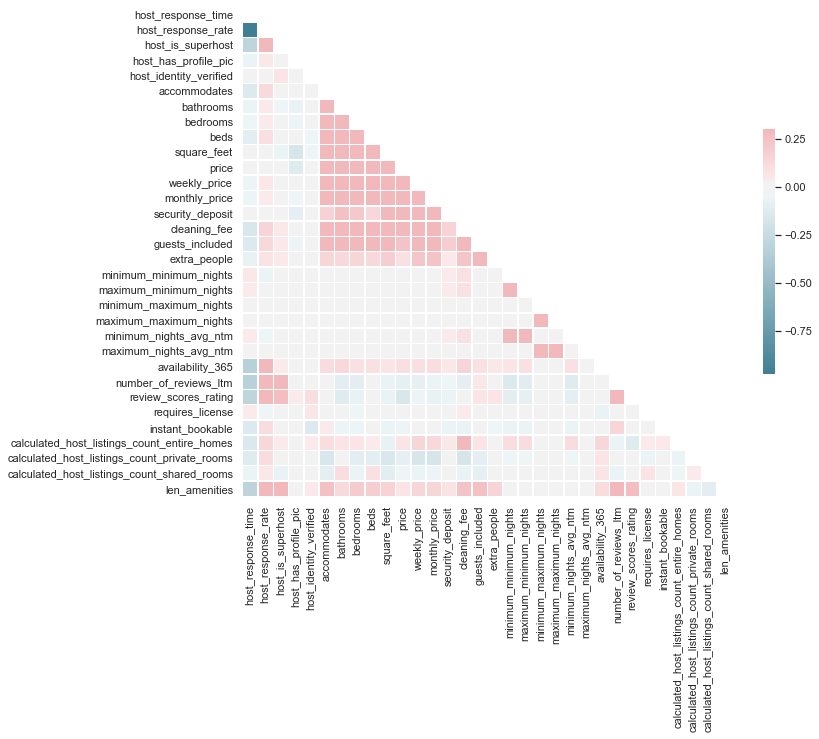

In [25]:
corr = relevant_df.corr()
A=relevant_df.corr().unstack().sort_values(ascending=False)
print('The correlation of the review_score_rating against all:', A['review_scores_rating'][1:-1])

#correlation matrix _visualization
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<module 'matplotlib.pyplot' from 'C:\\Users\\82151\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

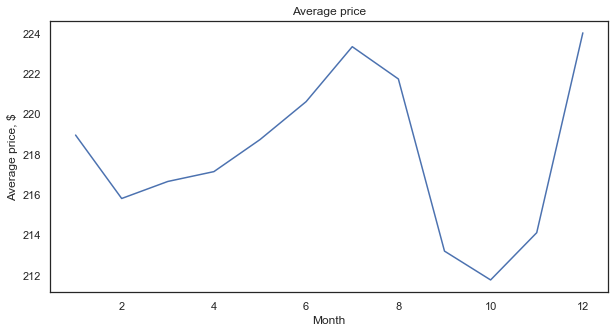

In [26]:
# Your code to answer Question 2
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
df_listing_sample = df_listing[["id", "room_type"]]
df_calendar_sample = df_calendar[["listing_id", "date", "price"]]
df_merge = df_listing_sample.merge(df_calendar_sample, how = "inner", left_on = "id", right_on = "listing_id")
dt=df_merge["date"]
dt = dt.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
df_merge["month"] = dt.map(lambda x: x.month)
df_merge["price"] = df_merge["price"].apply(lambda x: float(x.strip("$").replace(",","")) if type(x) != float else x)
avgprice=df_merge.groupby(by=["month"])["price"].mean()

#plot
plt.figure(figsize=(10,5))
plt.plot(avgprice)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')
plt.savefig('average price for month')
plt


In [44]:
# Your code to answer Question 3
amen_count = {}
for index, row in df_listing.iterrows():
    types = row["amenities"].strip("{").strip("}").split(",")
    for t in types:
        t = t.lower().strip('"')
        if t in amen_count.keys():
            amen_count[t] += 1
        else:
            amen_count[t] = 1
top10_common = dict(sorted(amen_count.items(), key=lambda kv: kv[1], reverse = True)[:10])
print("The 10 commonest amenities are: ", str(top10_common.keys()).strip("dict_keys([").strip("])"))

The 10 commonest amenities are:  'wifi', 'essentials', 'smoke detector', 'kitchen', 'heating', 'hangers', 'shampoo', 'tv', 'carbon monoxide detector', 'air conditioning'


In [28]:
amen_score = {}
for a in amen_count.keys():
    df_listing["if_a"] = df_listing.amenities.apply(lambda x: "yes" if a in x.lower() else "no")
    amen_score[a] = list(df_listing.groupby("if_a").review_scores_rating.mean())
    if len(amen_score[a]) == 2 and amen_score[a][1] >= 0:
        amen_score[a].append(amen_score[a][0]-amen_score[a][1])
    else:
        del amen_score[a]
top10_important = dict(sorted(amen_score.items(), key=lambda kv: kv[1], reverse = False)[:10])
print("The 10 most important amenities are: ", str(top10_important.keys()).strip("dict_keys([").strip("])"))
top10_not = dict(sorted(amen_score.items(), key=lambda kv: kv[1], reverse = True)[:10])
print("The 10 least important amenities are: ", str(top10_not.keys()).strip("dict_keys([").strip("])"))

The 10 most important amenities are:  'wifi', 'essentials', 'shampoo', 'hangers', 'smoke detector', 'parking', 'hair dryer', 'heating', 'hot water', 'dryer'
The 10 least important amenities are:  'pool', 'kitchen', 'washer', 'gym', 'elevator', 'hot tub', 'pets allowed', 'indoor fireplace', 'suitable for events', 'smoking allowed'


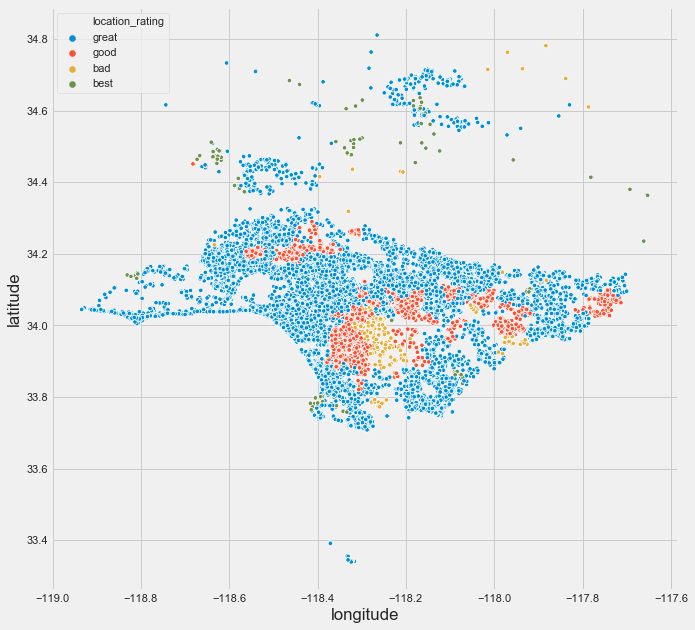

In [29]:
# Your code to answer Question 4
df_listing["avg_score_location"] = df_listing.groupby("neighbourhood_cleansed").review_scores_location.transform(lambda x:x.mean())

def rate_location(score):
    if score == 10.0:
        return "best"
    elif score < 10 and score >= 9.5:
        return "great"
    elif score < 9.5 and score >= 9.0:
        return "good"
    else:
        return "bad"

df_listing["location_rating"] = df_listing.avg_score_location.apply(rate_location)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='location_rating',s=20, data=df_listing)

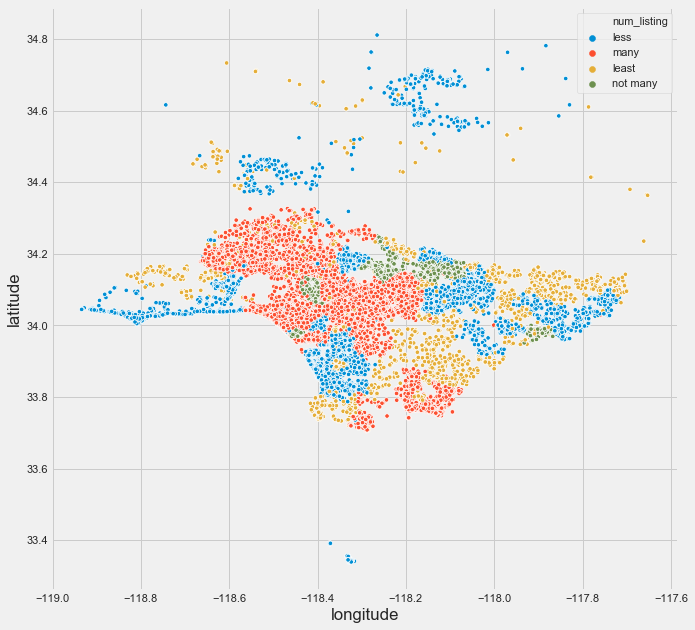

In [30]:
df_listing.city.fillna("other", inplace = True)
df_listing["count_listing"] = df_listing.groupby("city").id.transform(lambda x:x.count())

def num_list(num):
    if num >= 900:
        return "many"
    elif num < 900 and num >= 500:
        return "not many"
    elif num < 500 and num >= 100:
        return "less"
    else:
        return "least"

df_listing["num_listing"] = df_listing.count_listing.apply(num_list)

plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='num_listing',s=20, data=df_listing)

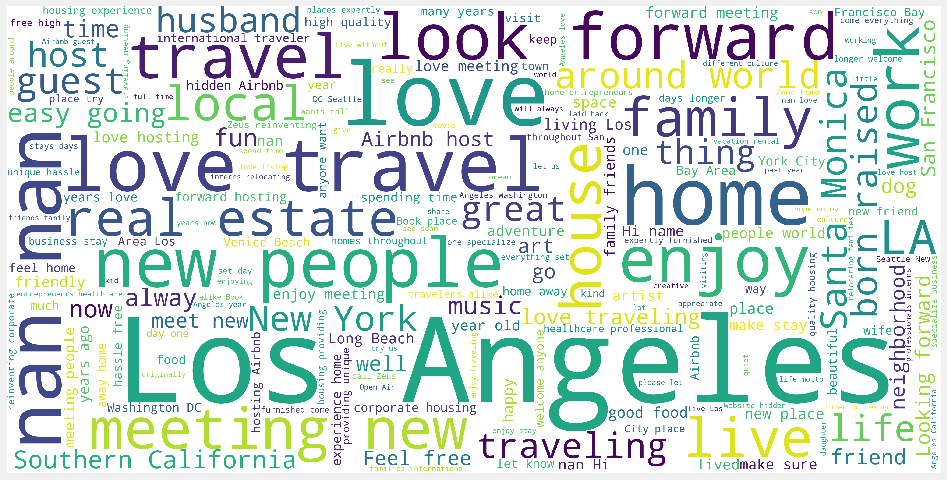

In [46]:
# Your code to answer Question 5
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

df_listing1=df_listing.loc[df_listing.host_is_superhost == 1,"host_about"].to_frame()
df_listing2=df_listing.loc[df_listing.host_is_superhost == 0,"host_about"].to_frame()
df_listing1['host_about'] = df_listing1['host_about'].astype('str')
description_corpus = ' '.join(df_listing1['host_about'])
description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description_corpus)
plt.figure(figsize = (16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()


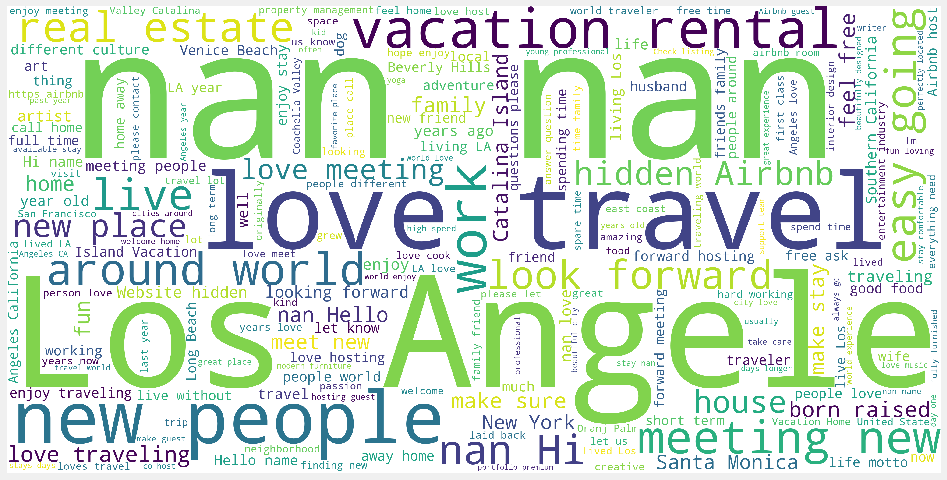

In [47]:
df_listing2['host_about'] = df_listing2['host_about'].astype('str')
description_corpus = ' '.join(df_listing2['host_about'])
description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description_corpus)
plt.figure(figsize = (16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

# Executive Summary

### Research Goal: Find out the actions Airbnb should take to improve customers' living experience.  
### Research Step:    
1.Find out the factors which influence the customers' living experience(review_scores_rating) by correlation analysis.  
2.According to the factors in step 1, find out solutions to attain better living experience.  

#### Step 1  
**Question 1: If Airbnb wants to improve the living experience of customers, what factors should they consider?**  
According to the correlation of the review_scores_rating against all, the factors that have a positive impact on review_scores_rating are:  

number_of_reviews_ltm                           0.336126  
host_response_rate                              0.309447  
len_amenities                                   0.279124  
host_is_superhost                               0.273626  
host_identity_verified                          0.106176  
extra_people                                    0.067910  
guests_included                                 0.066493  
host_has_profile_pic                            0.046052  
calculated_host_listings_count_private_rooms    0.022064  
requires_license                                0.019773  
availability_365                                0.001356  
instant_bookable                                0.000207  

the factors that have a negative impact on review_scores_rating are:  
maximum_nights_avg_ntm                         -0.000388  
maximum_maximum_nights                         -0.000406  
minimum_maximum_nights                         -0.000433  
accommodates                                   -0.006930  
beds                                           -0.012303  
cleaning_fee                                   -0.023064  
calculated_host_listings_count_shared_rooms    -0.037402  
weekly_price                                   -0.050467  
security_deposit                               -0.057535  
square_feet                                    -0.064166  
bedrooms                                       -0.074006  
monthly_price                                  -0.074996  
maximum_minimum_nights                         -0.080351  
minimum_nights_avg_ntm                         -0.085034  
minimum_minimum_nights                         -0.095001  
bathrooms                                      -0.112924  
calculated_host_listings_count_entire_homes    -0.120461  
price                                          -0.153900  

As the correlation score shows, if Airbnb wants to improve the customers' living experience (increase the review rating), they should pay attention to the behavior of hosts, the amenities, and the price of the listings.   
We then try to explore the relationship of the variables by correlation matrix. From the matrix of correlation, we find out whether the host is a super host has influence on the host behavior (e.g. host response rate).  
So we want to make further analysis on the price, amenities, and hosts. Also, the location is an essential feature of a house, which is included in the correlation matrix and needs our attention.  

#### Step 2
##### (1)Price  
**Question 2: As we can see from Question1, higher price will leave a negative impact on the customers' living experience. In which month should Airbnb offer extra discounts to customers in order to decrease the negative impact of the price?**  
We calculate the average price of the house in each month of a year and draw a line chart to see the trend.  
From the line chart, we can see that the average price reaches the peak in July and December, the higher price may leave a negative impact on the customers because they pay a higher price for the same services and experience. So Airbnb could pay attention to the price in July and December, taking action to decrease the negative impact by offering extra discount and allowance. 

##### (2)Amenities  
**Question 3: From Question 1, we know that customers care about the number of amenities. Which amenities should Airbnb encourage the host to offer to the customers?**  
We extract the amenities and calculate their frequencies and the difference in review ratings considering whether or not a listing has each kind of amenities.  
We found that the 10 most common amenities offered are: 'wifi', 'essentials', 'smoke detector', 'kitchen', 'heating', 'hangers', 'shampoo', 'tv', 'carbon monoxide detector', 'air conditioning'.  
The 10 most important amenities are: 'wifi', 'dryer', 'heating', 'hangers', 'smoke detector', 'parking', 'hair dryer', 'shampoo', 'essentials', 'spa'.  
The 10 least important amenities are: 'elevator', 'gym', 'pool', 'kitchen', 'smoking allowed', 'hot tub', 'paid parking on premises', 'paid parking off premises', 'suitable for events', 'pets allowed'.  
Therefore, WIFI, heating, essentials, smoke detectors and shampoo should be offered. On the contrary, offering kitchen may not be a good choice even though lots of hosts offer it. Also, allowing smoking or pets is also a bad idea. Customers also don't like paid parking.  
An surpricing finding is that offering elevator, gym, pool and hot tub are not good for customers. This contradicts our general thoughts and we think may be these amenities are always offered in bad conditions.  

##### (3)Location  
**Question 4: Which neighborhood should Airbnb pay more attention to in order to improve customers living experience?**  
We divide LA according to the average scores about location as well as the number of listings in different areas.  
We found that the area that has a latitude of 33.8 to 34.0 and a longitude of -118.4 to -118.2 has relatively low scores on location. However, this area already has many listings, which means customers actually have many choices. Therefore, Aribnb should carefully investigate in this area and found the reason behind it and improve customers' impression.  

##### (4)Host
**Question 5: From Question1, superhosts have a positive impact on customers' living experince. What are the features of superhost? What about non-superhost? What's the difference between them?**  
We do analysis on the words in "host_about" to explore the features of superhost and non-superhost.  
From the wordcloud of superhost, we can see that the features of embracing new things, making people feel at home, and local.  
From the wordcloud of non-superhost, the distinct features are loving travel, and meeting new.  
Our analysis shows that the super hosts are local people who attach great importance on the family as well as opening to new things, while the nonsuper hosts are people who have a high passion for trying new things.  
Besides, the "nan" actually represents missing value in "host_about". Non-superhosts tend to leave their personal description blank, which may also lead to lower scores.